In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("synthetic_lacrosse_data.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.head()

,player_id,date,jump_height_cm,peak_power_bm,training_load,soreness,energy,stress,acwr
0,WL_001,2024-09-01,41.913479,63.583376,281.203728,2.403951,1.522753,8.795585,1.24
1520,WL_020,2024-09-01,40.308056,45.204851,420.964011,4.434169,7.660324,6.649304,1.04
240,WL_004,2024-09-01,43.371527,53.389563,445.994066,6.416934,6.241804,7.732659,1.43
320,WL_005,2024-09-01,34.946745,52.555677,307.848954,9.100749,2.045251,9.603269,0.98
400,WL_006,2024-09-01,44.918883,42.968474,387.088777,3.992105,1.509271,4.365289,1.55


In [2]:
# Acute = 7-day rolling mean
df['acute_load'] = df['training_load'].rolling(window=7).mean()

# Chronic = 28-day rolling mean
df['chronic_load'] = df['training_load'].rolling(window=28).mean()

df[['date','training_load','acute_load','chronic_load']].tail()

,date,training_load,acute_load,chronic_load
1199,2024-11-19,353.430072,339.621111,325.793412
1279,2024-11-19,406.530313,352.242115,329.277130
1359,2024-11-19,415.785978,374.694395,334.242499
719,2024-11-19,275.128698,369.125135,332.444502
1599,2024-11-19,371.594234,360.371727,333.118205


In [3]:
df['acwr'] = df['acute_load'] / df['chronic_load']
df[['date','acwr']].tail()


,date,acwr
1199,2024-11-19,1.042443
1279,2024-11-19,1.069744
1359,2024-11-19,1.121026
719,2024-11-19,1.110336
1599,2024-11-19,1.081813


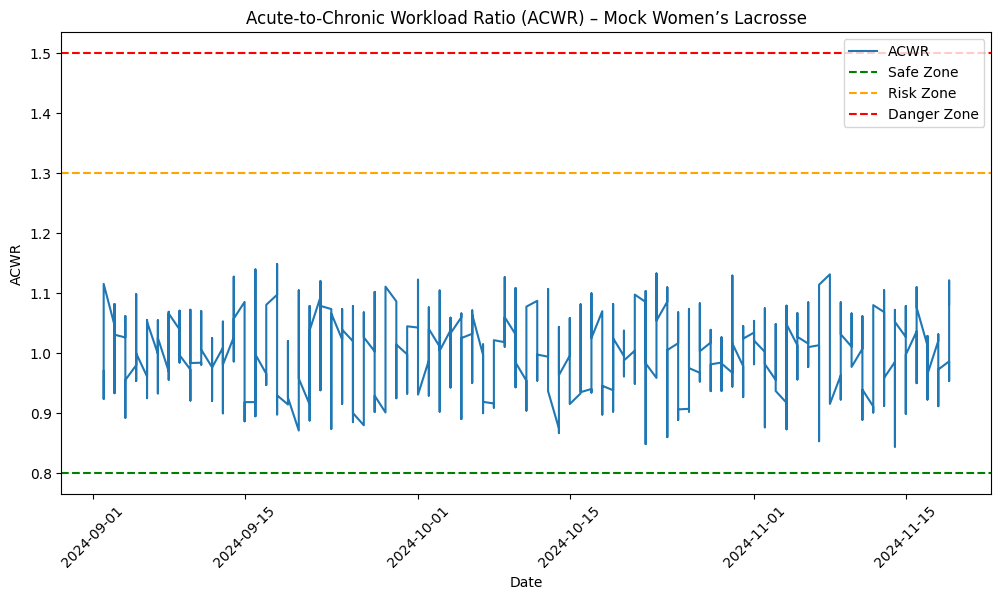

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['acwr'], label='ACWR')

plt.axhline(0.8, color='green', linestyle='--', label='Safe Zone')
plt.axhline(1.3, color='orange', linestyle='--', label='Risk Zone')
plt.axhline(1.5, color='red', linestyle='--', label='Danger Zone')

plt.title("Acute-to-Chronic Workload Ratio (ACWR) – Mock Women’s Lacrosse")
plt.xlabel("Date")
plt.ylabel("ACWR")
plt.legend()
plt.xticks(rotation=45)
plt.show()
